In [67]:
#configuration
import os
import torch # PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
from textwrap import wrap
import seaborn as sns
import matplotlib.pyplot as plt
import re
import whois
import datetime
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld
import math
from urllib.parse import urlparse



In [68]:
import pandas as pd
file_path = '/home/roy/Documents/last year/cyber/data.csv'
df = pd.read_csv(file_path)


In [69]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [70]:
df

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [71]:
df['label'].value_counts()

label
good    344821
bad      75643
Name: count, dtype: int64

In [72]:
'''
in the first step we need to do Data Preprocessing //need to do more
'''
df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [73]:

df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work
df

/tmp/ipykernel_6741/2035965311.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work


,url,label
0,diaryofagameaddict.com,0
1,espdesign.com.au,0
2,iamagameaddict.com,0
3,kalantzis.net,0
4,slightlyoffcenter.net,0
...,...,...
420459,23.227.196.215/,0
420460,apple-checker.org/,0
420461,apple-iclods.org/,0
420462,apple-uptoday.org/,0


In [74]:

# Function to check if a URL uses an IP address
def uses_ip_address(url):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(url))
    
def lengthurl(url):
    return len(url)

def countletters(url):
    count = 0
    for char in url:
        if char.isalpha():
            count += 1
    return count
    
def count_digits(url):
    count = 0
    for char in url:
        if char.isdigit():
            count += 1
    return count

def numberDots(url):
    count =0
    for char in url:
        if char=='.':
            count+=1

    return count

def numberHyphen(url):
    count =0
    for char in url:
        if char=='-':
            count+=1

    return count

def numberBackSlash(url):
    count =0
    for char in url:
        if char=='/':
            count+=1

    return count

def count_letter_digit_letter(url):
    pattern = re.compile(r'[a-zA-Z]\d+[a-zA-Z]')
    occurrences = len(re.findall(pattern, url))
    return occurrences


def count_digit_letter_digit(url):
    pattern = re.compile(r'\d+[a-zA-Z]\d+')
    occurrences = len(re.findall(pattern, url))
    return occurrences

# Function to count delimiters and find the longest word length
def analyze_delimiters_and_longest_word(url):
    delimiters_count = {}
    longest_word_length = 0
    
    # Define delimiters as any non-alphanumeric characters
    delimiters = re.compile(r'[^a-zA-Z0-9]+')
    components = re.split(delimiters, url)
    
    # Iterate over the components
    for component in components:
        # Count delimiters in each component
        delimiters_count[component] = len(re.findall(delimiters, component))
        
        # Find the longest word length
        if len(component) > longest_word_length:
            longest_word_length = len(component)
    
    return delimiters_count, longest_word_length

def check_domain_reputation(domain):
    known_malicious_domains = ['maliciousdomain1.com', 'maliciousdomain2.net']  # need to add more
    if domain in known_malicious_domains:
        return True
    else:
        return False
        

def has_suspicious_keywords(url):
    suspicious_keywords = ['phishing', 'malware', 'scam']  # Add more 
    for keyword in suspicious_keywords:
        if keyword in url:
            return True
    return False
    
def has_subdomains(url):
    if len(url.split('.')) > 2:
        return 1
    else:
        return 0
    
def analyze_whois(domain):
    try:
        domain_info = whois.whois(domain)
        # You would analyze the WHOIS information here and return True/False based on some criteria
        # For simplicity, let's just return True if we get WHOIS information without errors
        return 1
    except:
        return 0

def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

def number_rate(url):
    # Count occurrences of digits
    digit_count = sum(1 for char in url if char.isdigit())
    
    # Compute number rate
    rate = digit_count / len(url) if len(url) > 0 else 0
    
    return rate

def alphabet_entropy(url):
    # Count occurrences of each letter
    letter_counts = {chr(i): 0 for i in range(ord('a'), ord('z') + 1)}
    total_letters = 0
    
    for char in url.lower():
        if 'a' <= char <= 'z':  # Check if char is a lowercase English letter
            letter_counts[char] += 1
            total_letters += 1
    
    # Compute probabilities and entropy
    entropy = 0
    for count in letter_counts.values():
        if count > 0:
            probability = count / total_letters
            entropy -= probability * math.log2(probability)
    
    return entropy


df['https'] = df['url'].apply(lambda i: httpSecure(i))
df['uses_ip'] = df['url'].apply(uses_ip_address)
df['count_digits'] = df['url'].apply(count_digits)
df['count_letters'] = df['url'].apply(countletters)
df['length'] = df['url'].apply(lengthurl)
df['letter_digit_letter_count'] = df['url'].apply(count_letter_digit_letter)
df['digit_letter_digit_count'] = df['url'].apply(count_digit_letter_digit)
df['delimiters_count'], df['longest_word_length'] = zip(*df['url'].apply(analyze_delimiters_and_longest_word))
df['domain_reputation'] = df['url'].apply(check_domain_reputation) #
df['has_suspicious_keywords'] = df['url'].apply(has_suspicious_keywords)
df['has_subdomains'] = df['url'].apply(has_subdomains)
df['whois_info'] = df['url'].apply(analyze_whois) #
df['numberDots'] = df['url'].apply(numberDots) 
df['numberHyphen'] = df['url'].apply(numberHyphen) 
df['numberBackSlash'] = df['url'].apply(numberBackSlash) 
df['number_rate'] = df['url'].apply(number_rate)
df['alphabet_entropy'] = df['url'].apply(alphabet_entropy)

In [75]:



# Applying the functions to each URL component





In [76]:
df

,url,label,https,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,delimiters_count,longest_word_length,domain_reputation,has_suspicious_keywords,has_subdomains,whois_info,numberDots,numberHyphen,numberBackSlash,number_rate,alphabet_entropy
0,diaryofagameaddict.com,0,0,False,0,21,22,0,0,"{'diaryofagameaddict': 0, 'com': 0}",18,False,False,0,0,1,0,0,0.000000,3.403989
1,espdesign.com.au,0,0,False,0,14,16,0,0,"{'espdesign': 0, 'com': 0, 'au': 0}",9,False,False,1,0,2,0,0,0.000000,3.521641
2,iamagameaddict.com,0,0,False,0,17,18,0,0,"{'iamagameaddict': 0, 'com': 0}",14,False,False,0,0,1,0,0,0.000000,2.984234
3,kalantzis.net,0,0,False,0,12,13,0,0,"{'kalantzis': 0, 'net': 0}",9,False,False,0,0,1,0,0,0.000000,3.084963
4,slightlyoffcenter.net,0,0,False,0,20,21,0,0,"{'slightlyoffcenter': 0, 'net': 0}",17,False,False,0,0,1,0,0,0.000000,3.546439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420459,23.227.196.215/,0,0,True,11,0,15,0,0,"{'23': 0, '227': 0, '196': 0, '215': 0, '': 0}",3,False,False,1,0,3,0,1,0.733333,0.000000
420460,apple-checker.org/,0,0,False,0,15,18,0,0,"{'apple': 0, 'checker': 0, 'org': 0, '': 0}",7,False,False,0,0,1,1,1,0.000000,3.189898
420461,apple-iclods.org/,0,0,False,0,14,17,0,0,"{'apple': 0, 'iclods': 0, 'org': 0, '': 0}",6,False,False,0,0,1,1,1,0.000000,3.378783
420462,apple-uptoday.org/,0,0,False,0,15,18,0,0,"{'apple': 0, 'uptoday': 0, 'org': 0, '': 0}",7,False,False,0,0,1,1,1,0.000000,3.323231


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/roy/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/roy/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this wa

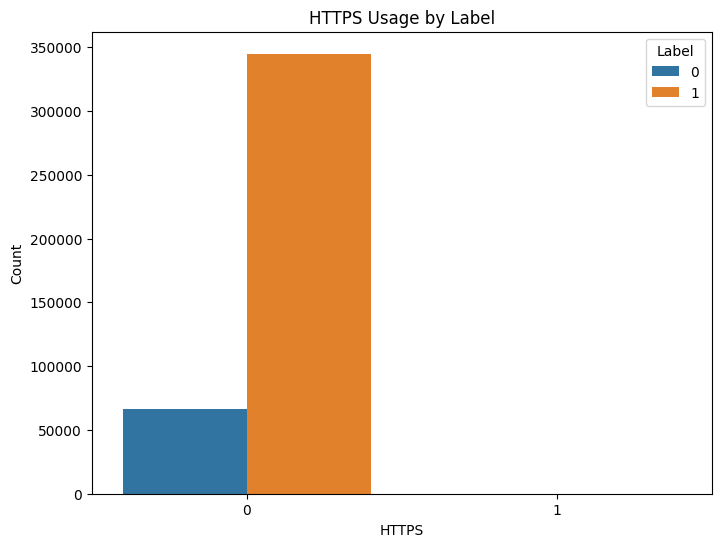

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/home/roy/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/roy/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this wa

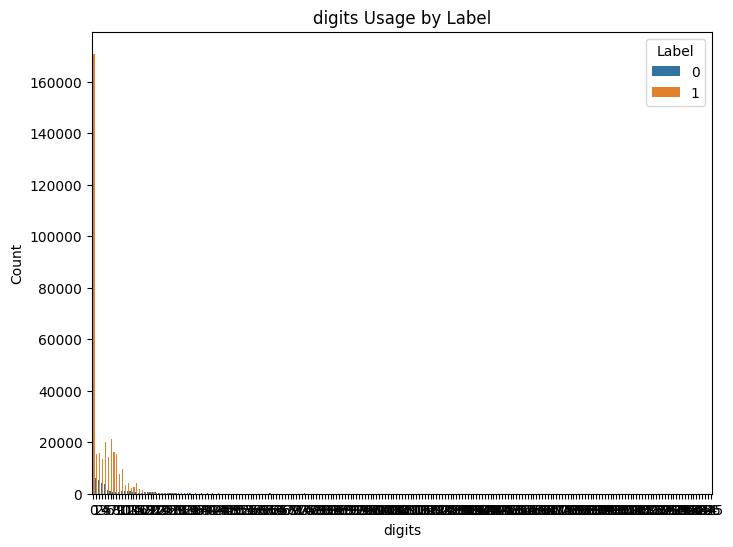

"\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='length', hue='label')\nplt.title('length Usage by Label')\nplt.xlabel('length')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='letter_digit_letter_count', hue='label')\nplt.title('letter_digit_letter_count Usage by Label')\nplt.xlabel('letter_digit_letter')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='digit_letter_digit_count', hue='label')\nplt.title('digit_letter_digit Usage by Label')\nplt.xlabel('digit_letter_digit')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='longest_word_length', hue='label')\nplt.title('longest_word_length Usage by Label')\nplt.xlabel('longest_word_length')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\np

In [77]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='https', hue='label')
plt.title('HTTPS Usage by Label')
plt.xlabel('HTTPS')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='count_digits', hue='label')
plt.title('digits Usage by Label')
plt.xlabel('digits')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()
'''
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='length', hue='label')
plt.title('length Usage by Label')
plt.xlabel('length')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='letter_digit_letter_count', hue='label')
plt.title('letter_digit_letter_count Usage by Label')
plt.xlabel('letter_digit_letter')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='digit_letter_digit_count', hue='label')
plt.title('digit_letter_digit Usage by Label')
plt.xlabel('digit_letter_digit')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='longest_word_length', hue='label')
plt.title('longest_word_length Usage by Label')
plt.xlabel('longest_word_length')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='has_subdomains', hue='label')
plt.title('has_subdomains Usage by Label')
plt.xlabel('has_subdomains')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='numberDots', hue='label')
plt.title('numberDots Usage by Label')
plt.xlabel('numberDots')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='numberHyphen', hue='label')
plt.title('numberHyphen Usage by Label')
plt.xlabel('numberHyphen')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='numberBackSlash', hue='label')
plt.title('numberBackSlash Usage by Label')
plt.xlabel('numberBackSlash')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()
'''

In [78]:
from urllib.parse import urlparse

# Function to check if the domain name is an IP address
def uses_ip_address(url):
    domain = urlparse(url).hostname
    if domain:
        ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
        return bool(ip_pattern.match(domain))
    return False

# Function to check if the port number is the default HTTP port (80)
def uses_default_port(url):
    parsed_url = urlparse(url)
    port = parsed_url.port
    if not port:  # If port is not specified in the URL
        return True  # Default to port 80
    return port == 80  # Compare port to default HTTP port

# Add columns for IP address usage and default port usage
df['uses_ip_address'] = df['url'].apply(uses_ip_address)
df['uses_default_port'] = df['url'].apply(uses_default_port)


In [79]:
import pandas as pd
from urllib.parse import urlparse

# Define the urlparsee function
def urlparsee(url, delimiters_count):
    # Extract domain components from the keys of the delimiters_count dictionary
    domain_components = list(delimiters_count.keys())
    
    # Encode each component into a one-hot vector
    domain_vector = []
    for component in domain_components:
        if component.isdigit():
            domain_vector.append(int(component))  # If the component is a number, simply append it
        else:
            for char in component:
                domain_vector.append(ord(char))  # Convert characters to ASCII and append
    
    # Find the most common urlparse
    most_common_urlparse = max(set(domain_components), key=domain_components.count)
    
    return domain_vector, most_common_urlparse

# Apply urlparsee function to 'url' column and add the result as new columns 'urlparsee' and 'most_common_urlparse'
df[['urlparsee', 'most_common_urlparse']] = df.apply(lambda row: pd.Series(urlparsee(row['url'], row['delimiters_count'])), axis=1)

# Display DataFrame
print(df)


                           url  label  https  uses_ip  count_digits  \
0       diaryofagameaddict.com      0      0    False             0   
1             espdesign.com.au      0      0    False             0   
2           iamagameaddict.com      0      0    False             0   
3                kalantzis.net      0      0    False             0   
4        slightlyoffcenter.net      0      0    False             0   
...                        ...    ...    ...      ...           ...   
420459         23.227.196.215/      0      0     True            11   
420460      apple-checker.org/      0      0    False             0   
420461       apple-iclods.org/      0      0    False             0   
420462      apple-uptoday.org/      0      0    False             0   
420463       apple-search.info      0      0    False             0   

        count_letters  length  letter_digit_letter_count  \
0                  21      22                          0   
1                  14      

Accuracy: 0.8692279635258359
Train Loss: 0.34323456411374786
Test Loss: 0.34251608439542935
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.25      0.38     19956
           1       0.87      0.99      0.93    103419

    accuracy                           0.87    123375
   macro avg       0.84      0.62      0.65    123375
weighted avg       0.86      0.87      0.84    123375

Class-wise Metrics:
              precision    recall  f1-score        support
0              0.816705  0.246943  0.379223   19956.000000
1              0.871929  0.989306  0.926916  103419.000000
accuracy       0.869228  0.869228  0.869228       0.869228
macro avg      0.844317  0.618124  0.653069  123375.000000
weighted avg   0.862996  0.869228  0.838326  123375.000000


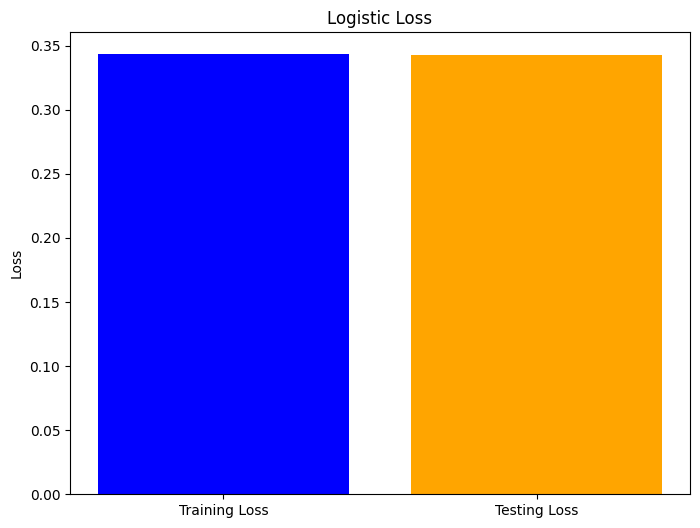

In [80]:

"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Define the urlparsee function
def urlparsee(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    
    # Split domain into its components
    domain_components = domain.split('.')
    
    # Encode each component into a one-hot vector
    domain_vector = []
    for component in domain_components:
        if component.isdigit():
            domain_vector.append(int(component))  # If the component is a number, simply append it
        else:
            for char in component:
                domain_vector.append(ord(char))  # Convert characters to ASCII and append
    
    # Find the most common urlparse
    most_common_urlparse = max(set(domain_components), key=domain_components.count)
    
    return domain_vector, most_common_urlparse

# Define features (X) and target variable (y)
X = df[[ 'uses_ip','count_letters', 'length', 'count_digits','number_rate','alphabet_entropy','uses_ip_address','uses_default_port','longest_word_length',
        'letter_digit_letter_count', 'digit_letter_digit_count',
         'has_suspicious_keywords',
         'has_subdomains','numberDots','numberHyphen','numberBackSlash']]
y = df['label']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_imputed, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate log loss
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))
test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate class-wise metrics
class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print("Class-wise Metrics:")
print(class_report_df)

# Plot logistic loss
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Testing Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()


Accuracy: 0.9103465045592705
Train Loss: 0.07077594369427516
Test Loss: 0.35701652220755126
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     19956
           1       0.93      0.96      0.95    103419

    accuracy                           0.91    123375
   macro avg       0.85      0.80      0.82    123375
weighted avg       0.91      0.91      0.91    123375

Class-wise Metrics:
              precision    recall  f1-score        support
0              0.768326  0.638154  0.697216   19956.000000
1              0.932388  0.962869  0.947383  103419.000000
accuracy       0.910347  0.910347  0.910347       0.910347
macro avg      0.850357  0.800512  0.822300  123375.000000
weighted avg   0.905851  0.910347  0.906919  123375.000000


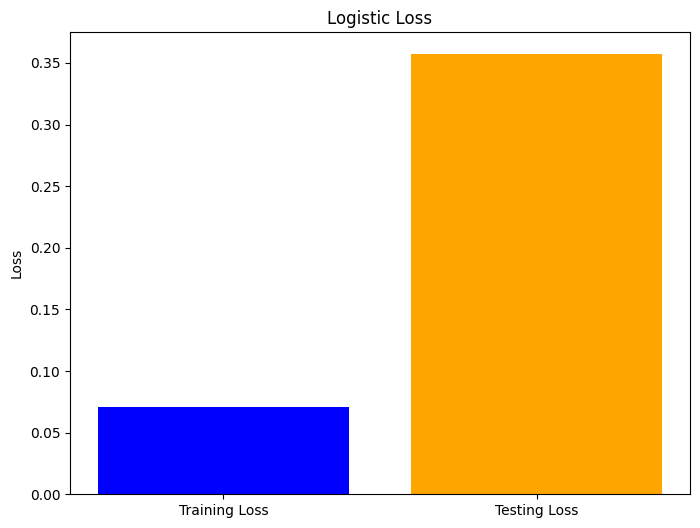

In [81]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Define the urlparsee function
def urlparsee(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    
    # Split domain into its components
    domain_components = domain.split('.')
    
    # Encode each component into a one-hot vector
    domain_vector = []
    for component in domain_components:
        if component.isdigit():
            domain_vector.append(int(component))  # If the component is a number, simply append it
        else:
            for char in component:
                domain_vector.append(ord(char))  # Convert characters to ASCII and append
    
    # Find the most common urlparse
    most_common_urlparse = max(set(domain_components), key=domain_components.count)
    
    return domain_vector, most_common_urlparse

# Define features (X) and target variable (y)
X = df[[ 'uses_ip','count_letters', 'length', 'count_digits','number_rate','alphabet_entropy','uses_ip_address','uses_default_port','longest_word_length',
        'letter_digit_letter_count', 'digit_letter_digit_count',
         'has_suspicious_keywords',
         'has_subdomains','numberDots','numberHyphen','numberBackSlash']]
y = df['label']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate log loss
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))
test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate class-wise metrics
class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print("Class-wise Metrics:")
print(class_report_df)

# Plot logistic loss
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Testing Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()


In [82]:
df

,url,label,https,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,delimiters_count,...,whois_info,numberDots,numberHyphen,numberBackSlash,number_rate,alphabet_entropy,uses_ip_address,uses_default_port,urlparsee,most_common_urlparse
0,diaryofagameaddict.com,0,0,False,0,21,22,0,0,"{'diaryofagameaddict': 0, 'com': 0}",...,0,1,0,0,0.000000,3.403989,False,True,"[100, 105, 97, 114, 121, 111, 102, 97, 103, 97...",com
1,espdesign.com.au,0,0,False,0,14,16,0,0,"{'espdesign': 0, 'com': 0, 'au': 0}",...,0,2,0,0,0.000000,3.521641,False,True,"[101, 115, 112, 100, 101, 115, 105, 103, 110, ...",espdesign
2,iamagameaddict.com,0,0,False,0,17,18,0,0,"{'iamagameaddict': 0, 'com': 0}",...,0,1,0,0,0.000000,2.984234,False,True,"[105, 97, 109, 97, 103, 97, 109, 101, 97, 100,...",com
3,kalantzis.net,0,0,False,0,12,13,0,0,"{'kalantzis': 0, 'net': 0}",...,0,1,0,0,0.000000,3.084963,False,True,"[107, 97, 108, 97, 110, 116, 122, 105, 115, 11...",kalantzis
4,slightlyoffcenter.net,0,0,False,0,20,21,0,0,"{'slightlyoffcenter': 0, 'net': 0}",...,0,1,0,0,0.000000,3.546439,False,True,"[115, 108, 105, 103, 104, 116, 108, 121, 111, ...",net
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420459,23.227.196.215/,0,0,True,11,0,15,0,0,"{'23': 0, '227': 0, '196': 0, '215': 0, '': 0}",...,0,3,0,1,0.733333,0.000000,False,True,"[23, 227, 196, 215]",
420460,apple-checker.org/,0,0,False,0,15,18,0,0,"{'apple': 0, 'checker': 0, 'org': 0, '': 0}",...,0,1,1,1,0.000000,3.189898,False,True,"[97, 112, 112, 108, 101, 99, 104, 101, 99, 107...",
420461,apple-iclods.org/,0,0,False,0,14,17,0,0,"{'apple': 0, 'iclods': 0, 'org': 0, '': 0}",...,0,1,1,1,0.000000,3.378783,False,True,"[97, 112, 112, 108, 101, 105, 99, 108, 111, 10...",iclods
420462,apple-uptoday.org/,0,0,False,0,15,18,0,0,"{'apple': 0, 'uptoday': 0, 'org': 0, '': 0}",...,0,1,1,1,0.000000,3.323231,False,True,"[97, 112, 112, 108, 101, 117, 112, 116, 111, 1...",


In [85]:
def convolution_block(x):
    conv_3_layer = layers.Conv1D(64, 3, padding='same', activation='elu')(x)
    conv_5_layer = layers.Conv1D(64, 5, padding='same', activation='elu')(x)
    conv_layer = layers.concatenate([x, conv_3_layer, conv_5_layer])
    conv_layer = layers.Flatten()(conv_layer)
    return conv_layer

def embedding_block(unique_value, size, name):
    input_layer = layers.Input(shape=(1,), name=name + '_input')
    embedding_layer = layers.Embedding(unique_value, size, input_length=1)(input_layer)
    return input_layer, embedding_layer

def create_model(sequence_length, n_char, unique_value):
    input_layer = []
    
    # sequence input layer
    sequence_input_layer = layers.Input(shape=(sequence_length,), name='url_input')
    input_layer.append(sequence_input_layer)
    
    # convolution block
    char_embedding = layers.Embedding(n_char + 1, 32, input_length=sequence_length)(sequence_input_layer)
    conv_layer = convolution_block(char_embedding)
    
    # entity embedding
    entity_embedding = []
    for key, n in unique_value.items():
        size = 4
        input_l, embedding_l = embedding_block(n + 1, size, key)
        embedding_l = layers.Reshape(target_shape=(size,))(embedding_l)
        input_layer.append(input_l)
        entity_embedding.append(embedding_l)
        
    # concat all layer
    fc_layer = layers.concatenate([conv_layer, *entity_embedding])
    fc_layer = layers.Dropout(rate=0.5)(fc_layer)
    
    # dense layer
    fc_layer = layers.Dense(128, activation='elu')(fc_layer)
    fc_layer = layers.Dropout(rate=0.2)(fc_layer)
    
    # output layer
    output_layer = layers.Dense(1, activation='sigmoid')(fc_layer)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[metrics.Precision(), metrics.Recall()])
    return model

# reset session
backend.clear_session()
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

# create model
model = create_model(sequence_length, n_char, unique_value)

# show model architecture
plot_model(model, to_file='model.png')
model_image = mpimg.imread('model.png')
plt.figure(figsize=(75, 75))
plt.imshow(model_image)
plt.show()

NameError: name 'backend' is not defined